In [1]:
from dreimac import GeometryExamples, PlotUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

%load_ext autoreload
%autoreload 2

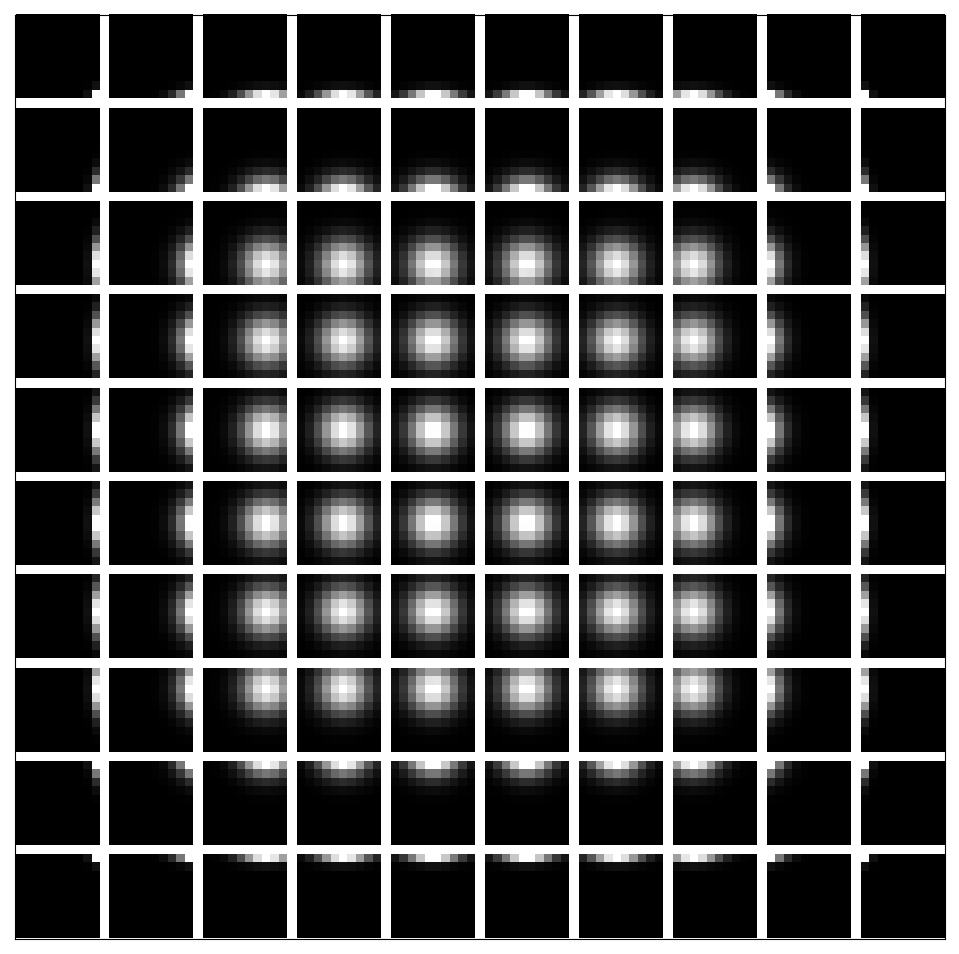

In [2]:
small_sample = GeometryExamples.moving_dot(10, sigma=2)

plt.figure(figsize=(12,12))
_ = PlotUtils.plot_patches(small_sample, zoom=6)

In [3]:
P = GeometryExamples.moving_dot(75, sigma=2)
dist_mat = GeometryUtils.geodesic_distance_estimate(P, 20, n_landmarks=...)

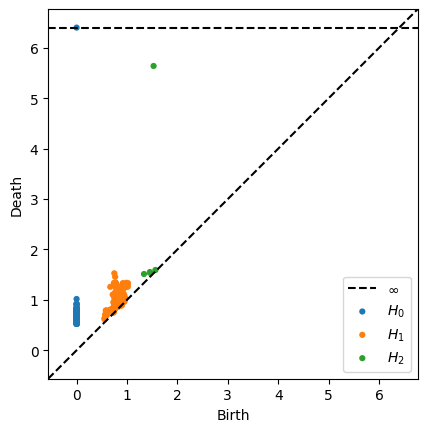

In [4]:
cpc = ComplexProjectiveCoords(dist_mat, n_landmarks=300, distance_matrix=True)
#cpc = ComplexProjectiveCoords(P, n_landmarks=400)

fig = plt.figure()
plot_diagrams(cpc.dgms_)

In [9]:
coords = cpc.get_coordinates(perc=0.8, proj_dim=1, cocycle_idx=0, projective_dim_red_mode="exponential")
coords_R3 = ProjectiveMapUtils.hopf_map(coords)

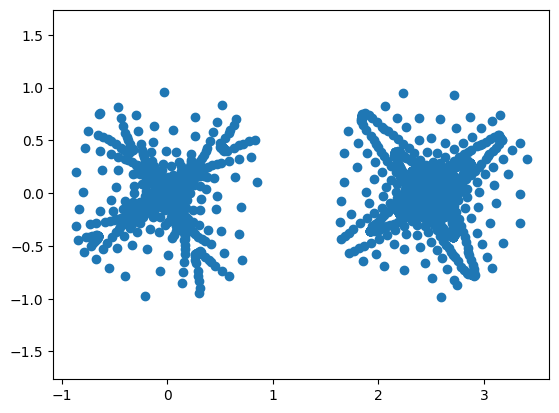

In [10]:
coords_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(coords_R3)
fig = plt.figure()
plt.scatter(coords_R2[:,0], coords_R2[:,1])
_ = plt.axis("equal")

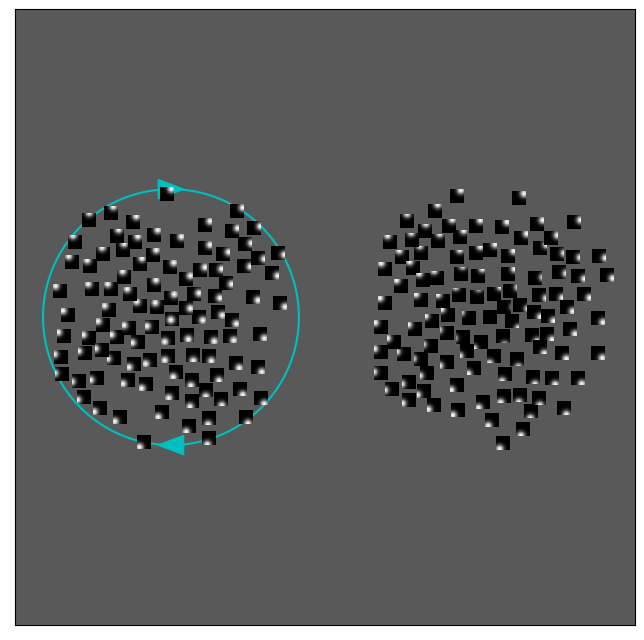

In [11]:
subsample = GeometryUtils.get_greedy_perm_pc(coords_R2, 200)['perm']

plt.figure(figsize=(8, 8))
PlotUtils.imscatter(coords_R2[subsample, :], P[subsample, :], 10)
_ = PlotUtils.plot_proj_boundary()

/var/folders/54/vxgwxr5943zb3yr6mmpzm4tw0000gn/T/ipykernel_45645/816662935.py:3: RuntimeWarning: invalid value encountered in divide
  per_cum_variance = np.cumsum(variances)/sum(variances)


(0.0, 1.0)

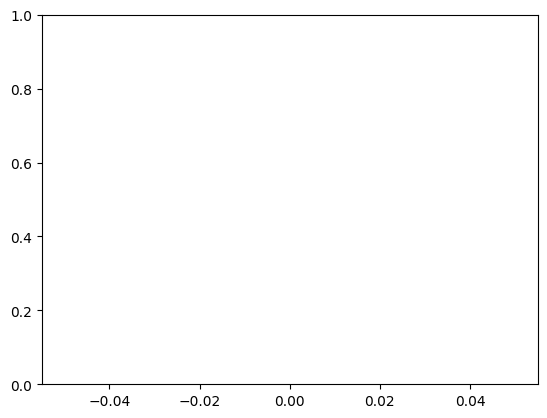

In [17]:
#plt.plot(cpc.variance_[:20], "-o")
variances = cpc.variance_ 
per_cum_variance = np.cumsum(variances)/sum(variances)
plt.plot(per_cum_variance[:20], "-o")
plt.ylim([0,1])

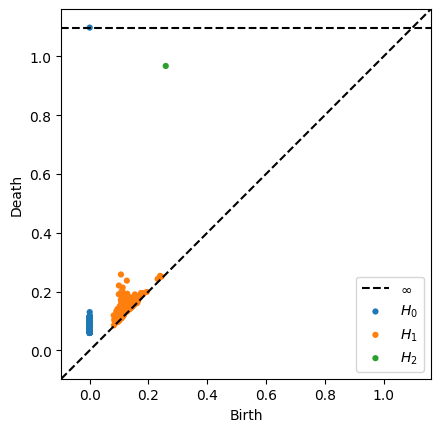

In [20]:
from ripser import ripser
from persim import plot_diagrams

distance_matrix = np.abs(coords @ np.conjugate(coords).T)
distance_matrix = np.maximum(distance_matrix,0)
distance_matrix = np.minimum(distance_matrix,1)
#distance_matrix = distance_matrix - np.diag(np.diag(distance_matrix)) + np.eye(distance_matrix.shape[0])
distance_matrix = np.arccos(distance_matrix)


pd = ripser(distance_matrix, coeff=3, maxdim=2, n_perm=300, distance_matrix=True)['dgms']
plot_diagrams(pd)

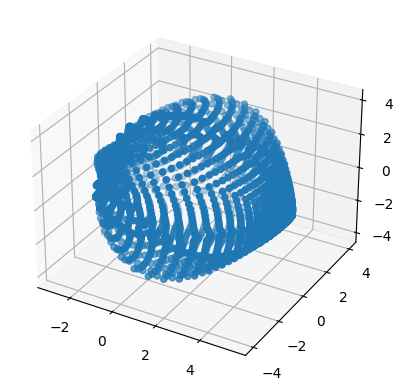

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2],s=20)